<a href="https://colab.research.google.com/github/Melonangie/DIF/blob/master/Proyecto_Avance_2_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

Tecnológico de Monterrey

Análisis de grandes volúmenes de datos

Dr. Néstor Velasco Bermeo

*   A00759664 Joel Orlando Hernández Ramos
*   A01793031 María de los Ángeles Rabelero Campos
*   A01794498 Daniel Gómez Álvarez

## **6.2 Avance de proyecto 2:**  Sistema de recomendación -  Arranque en frío

Anteriormente nuestro algoritmo hacia recomendaciones basado en las calificaciones de los usuarios. El enfoque basado en contenido puede mitigar el problema del arranque en frío a nivel de elemento porque los elementos que son nuevos y no tienen calificaciones se pueden sugerir a los usuarios basado en cálculos de similitud de cosenos, que miden la similitud entre los vectores numéricos que representan los elementos que se comparan.

Este enfoque empieza en el paso 13.


### 1. Importamos las librerias

In [30]:
# Manipulacion de datos
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Similitud de cosenos
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### 2. Importamos e inspeccionaos el dataset hospedado en Github

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/Melonangie/MNA/main/BigBasket%20Products.csv", index_col='index')
print(df.shape)
print(df.head())

(27555, 9)
                                                 product  \
index                                                      
1                 Garlic Oil - Vegetarian Capsule 500 mg   
2                                  Water Bottle - Orange   
3                         Brass Angle Deep - Plain, No.2   
4      Cereal Flip Lid Container/Storage Jar - Assort...   
5                     Creme Soft Soap - For Hands & Body   

                     category           sub_category              brand  \
index                                                                     
1            Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
2      Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
3        Cleaning & Household            Pooja Needs                Trm   
4        Cleaning & Household   Bins & Bathroom Ware             Nakoda   
5            Beauty & Hygiene       Bath & Hand Wash              Nivea   

       sale_price  market_price           

### 3. Iniciamos el Análisis exploratorio de datos (EDA)

Si los datos son nulos o faltan, no podemos usarlos para el análisis de datos.

In [32]:
print('-'*38)
print('Datos nulos por columna')
print('-'*38)
print(df.isnull().sum())
print('-'*38)
print('Porcentaje de datos nulos por columna')
print('-'*38)
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = df.shape[0]
    print("{} : {:.2f}".format(col,null_count/total_count * 100))

--------------------------------------
Datos nulos por columna
--------------------------------------
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64
--------------------------------------
Porcentaje de datos nulos por columna
--------------------------------------
product : 0.00
category : 0.00
sub_category : 0.00
brand : 0.00
sale_price : 0.00
market_price : 0.00
type : 0.00
rating : 31.30
description : 0.42


**Podemos observar:**
*   Hay un producto sin nombre.
*   Hay un producto sin marca.
*   115 productos no tienen descripción.
*   8626 productos no tienen valoraciones.

### 4. Borramos las lineas que les falte informacion
Eliminaremos las filas de los datos que contienen valores faltantes.

In [33]:
df = df.dropna()
df.shape

(18840, 9)

### 5. Analizamos la distribución de la columna Category

In [34]:
counts = df['category'].value_counts()
count_percentage = df['category'].value_counts(1)*100
counts_df = pd.DataFrame({'Categoria':counts.index,'Total':counts.values,'Porcentaje':np.round(count_percentage.values,2)})
display(counts_df)

,Categoria,Total,Porcentaje
0,Beauty & Hygiene,5460,28.98
1,"Kitchen, Garden & Pets",2494,13.24
2,Snacks & Branded Foods,2468,13.10
3,Gourmet & World Food,2364,12.55
4,"Foodgrains, Oil & Masala",2173,11.53
5,Cleaning & Household,2091,11.10
6,"Bakery, Cakes & Dairy",665,3.53
7,Beverages,630,3.34
8,Baby Care,495,2.63


In [35]:
px.bar(data_frame=counts_df,
  x='Categoria',
  y='Total',
  color='Total',
  color_continuous_scale='blues',
  text_auto=True,
  title=f'Total de Artículos por Categoría')

**Podemos observar:**
*   Beauty & Hygiene tiene 5460 productos, es el 28,98% del total de productos.
*   Kitchen, Garden & Pets tiene 2494 productos, es el 13,24% del total de productos.
*   Baby Care tiene 495 productos, es el 2,63% del total de productos.

### 6. Analizamos la distribución de la columna sub_category

---



In [36]:
counts = df['sub_category'].value_counts()
count_percentage = df['sub_category'].value_counts(1)*100
counts_df = pd.DataFrame({'Subcategoría':counts.index,'Total':counts.values,'Porcentaje':np.round(count_percentage.values,2)})
print('Valores únicos por Subcategoría',df['sub_category'].nunique())

Valores únicos por Subcategoría 77


In [37]:
print('Top 10 Subcategorías')
display(counts_df.head(10))

Top 10 Subcategorías


,Subcategoría,Total,Porcentaje
0,Skin Care,1641,8.71
1,Hair Care,818,4.34
2,Bath & Hand Wash,808,4.29
3,Masalas & Spices,764,4.06
4,Storage & Accessories,658,3.49
5,Men's Grooming,649,3.44
6,Fragrances & Deos,627,3.33
7,Crockery & Cutlery,621,3.30
8,Ready To Cook & Eat,557,2.96
9,Organic Staples,550,2.92


In [38]:
print('Ultimas 10 Subcategorías')
display(counts_df.tail(10))

Ultimas 10 Subcategorías


,Subcategoría,Total,Porcentaje
67,Flask & Casserole,39,0.21
68,Car & Shoe Care,39,0.21
69,Bakeware,37,0.20
70,Non Dairy,31,0.16
71,Baby Accessories,27,0.14
72,Bakery Snacks,24,0.13
73,Mothers & Maternity,23,0.12
74,Water,16,0.08
75,Gourmet Breads,10,0.05
76,Cuts & Sprouts,1,0.01


In [39]:
px.bar(data_frame=counts_df[:10],
  x='Subcategoría',
  y='Total',
  color='Total',
  color_continuous_scale='blues',
  text_auto=True,
  title=f'Top 10 Subcategorías más compradas')

In [40]:
px.bar(data_frame=counts_df[-10:],
  x='Subcategoría',
  y='Total',
  color='Total',
  color_continuous_scale='blues',
  text_auto=True,
  title=f'Ultimas 10 Subcategorías más compradas')

**Podemos observar:**
*   Hay 77 valores de subcategoría únicos.
*   Skin Care tiene 1641 productos, es el 8,71% del total de productos.
*   Hair Care tiene 818 productos, es el 4,34% del total de productos.
*   Cuts & Sprouts tiene 1 producto, es el 0,01% del total de productos.

### 7. Analizamos la distribución de la columna Brand

In [41]:
column = 'brand'
counts = df[column].value_counts()
count_percentage = df[column].value_counts(1)*100
counts_df = pd.DataFrame({'Marca':counts.index,'Total':counts.values,'Porcentaje':np.round(count_percentage.values,2)})
print('Valores únicos por Marca',df['sub_category'].nunique())

Valores únicos por Marca 77


In [42]:
print('Top 10 Marcas')
counts_df.head(10)

Top 10 Marcas


,Marca,Total,Porcentaje
0,bb Royal,278,1.48
1,BB Home,172,0.91
2,Amul,153,0.81
3,Himalaya,139,0.74
4,Cello,104,0.55
5,BIOTIQUE,103,0.55
6,DP,101,0.54
7,Keya,101,0.54
8,Organic Tattva,99,0.53
9,MTR,97,0.51


In [43]:
print('Ultimas 10 Marcas')
counts_df.tail(10)

Ultimas 10 Marcas


,Marca,Total,Porcentaje
1923,Diabetics Dezire,1,0.01
1924,Kerala,1,0.01
1925,Cetaphil,1,0.01
1926,Popular Essentials,1,0.01
1927,Sanitt,1,0.01
1928,Fazlani,1,0.01
1929,Fakira,1,0.01
1930,Sofia,1,0.01
1931,Dr. Schar,1,0.01
1932,4700BC,1,0.01


In [44]:
px.bar(data_frame=counts_df.head(10),
  x='Marca',
  y='Total',
  color='Total',
  color_continuous_scale='blues',
  text_auto=True,
  title=f'Top 10 artículos por marca según el total de artículos')

**Podemos observar:**
*   Hay 1933 valores únicos para las marcas.
*   Hay 494 marcas que tienen un solo producto.
*   bb Royal tiene 278 productos, es el 1,48% del total de productos.
*   BB Home tiene 172 productos, es el 0,91% del total de productos.

### 8. Analizamos la distribución de la columna Type



In [45]:
column = 'type'
counts = df[column].value_counts()
count_percentage = df[column].value_counts(1)*100
counts_df = pd.DataFrame({'Tipo de producto':counts.index,'Total':counts.values,'Porcentaje':np.round(count_percentage.values,2)})
print('Valores únicos por Tipo de productos',df[column].nunique())

Valores únicos por Tipo de productos 358


In [46]:
print('Top 10 Tipos de productos')
display(counts_df.head(10))

Top 10 Tipos de productos


,Tipo de producto,Total,Porcentaje
0,Face Care,1094,5.81
1,Men's Deodorants,404,2.14
2,Shampoo & Conditioner,390,2.07
3,Blended Masalas,343,1.82
4,Containers Sets,332,1.76
5,Bathing Bars & Soaps,322,1.71
6,Glassware,263,1.40
7,Body Care,251,1.33
8,Namkeen & Savoury Snacks,234,1.24
9,Hand Wash & Sanitizers,212,1.13


In [47]:
px.bar(data_frame=counts_df.head(10),
  x='Tipo de producto',
  y='Total',
  color='Total',
  color_continuous_scale='blues',
  text_auto=True,
  title=f'Top 10 Tipo de producto')

**Podemos observar:**
*   Hay 358 tipos de productos.
*   Existen 9 clasificaciones de tipos de productos con un solo producto.
*   Facial Care tiene 1094 productos, es el 5,81% del total de productos.
*   Men's Deodorants tiene 404 productos, es el 2,14% del total de productos.

### 9. Análisis de Ratings

Observemos el histograma de la columna "rating".

count    18840.000000
mean         3.943063
std          0.739646
min          1.000000
25%          3.700000
50%          4.100000
75%          4.300000
max          5.000000
Name: rating, dtype: float64


<Axes: >

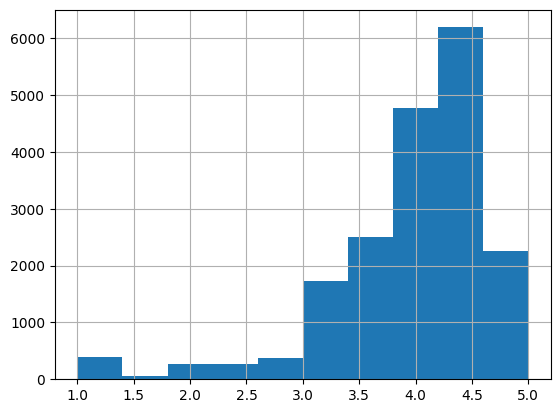

In [48]:
print(df['rating'].describe())
df['rating'].hist(bins=10)

Podemos ver que el histograma está inclinado a la derecha,  porque
los productos tienen una calificación más alta.

Observemos las calificaciones por intervalos.

In [49]:
pd.cut(df.rating,bins = [0,1,2,3,4,5]).reset_index().groupby(['rating']).size()

rating
(0, 1]      387
(1, 2]      335
(2, 3]     1347
(3, 4]     6559
(4, 5]    10212
dtype: int64

**Podemos observar:**
*   10212 productos tienen una calificación entre 4 y 5.
*   387 productos tienen una calificación entre 0 y 1.

### 10. Analisis de Features

Vamos a seleccionar los features para las recomendaciones. Comenzaremos creando el feature descuento

In [50]:
df['descuento'] = (df['market_price']-df['sale_price'])*100/df['market_price']
df['descuento'].describe()

count    18840.000000
mean        11.751733
std         14.546937
min          0.000000
25%          0.000000
50%          5.000000
75%         20.000000
max         82.506266
Name: descuento, dtype: float64

Observemos los descuentos por intervalos y su histograma.

In [51]:
pd.cut(df.descuento,bins = [-1,0,10,20,30,40,50,60,80,90,100]).reset_index().groupby(['descuento']).size()

descuento
(-1, 0]      8157
(0, 10]      3125
(10, 20]     2962
(20, 30]     2435
(30, 40]     1126
(40, 50]      700
(50, 60]      223
(60, 80]      108
(80, 90]        4
(90, 100]       0
dtype: int64

<Axes: >

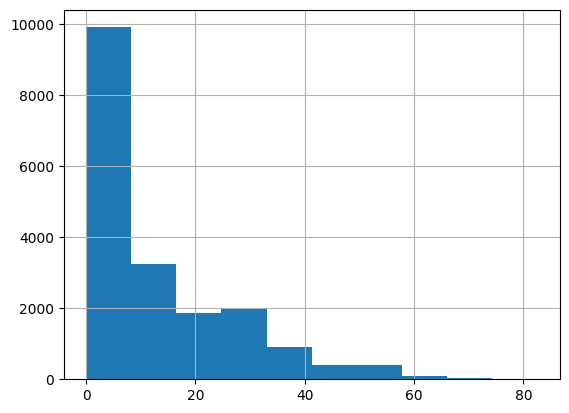

In [52]:
df['descuento'].hist()

**Podemos observar:**
*   8157 productos no tienen ningún descuento.
*   Al menos 4 productos tienen más del 80% de descuento.

### 11. Creacion de Features

Limpiamos y transformamos las columnas siguientes para crear el feature features_clasificacion_de_productos que agregara las columnas ya limpias y transformadas.
*   Kitchen, Garden & Pets
*   sub_category
*   type
*   brand

In [53]:
df2 = df.copy()
rmv_spc = lambda a:a.strip()
get_list = lambda a:list(map(rmv_spc,re.split(r'& |, |\*|n', a)))

for col in ['category', 'sub_category', 'type']:
    df2[col] = df2[col].apply(get_list)

def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

for col in ['category', 'sub_category', 'type','brand']:
    df2[col] = df2[col].apply(cleaner)

def couple(x):
    return ' '.join(x['category']) + ' ' + ' '.join(x['sub_category']) + ' '+x['brand']+' ' +' '.join( x['type'])

df2['features_clasificacion_de_productos'] = df2.apply(couple, axis=1)

### 12. Construiremos la lógica para recomendaciones basadas en popularidad

Usaremos el feed de recomendación: tipo, categoría o subcategoría. Devolverá el producto más popular o el producto que tenga la calificación más alta.

In [54]:
def recomendacion_mas_popular(col,col_value,top_n=5):
  return df[df[col]==col_value].sort_values(by='rating',ascending = False).head(top_n)[['product',col,'rating']]

Observemos los productos más populares de la categoría Beauty & Hygiene

In [55]:
recomendacion_mas_popular(col='category',col_value='Beauty & Hygiene')

,product,category,rating
index,,,
20164,Supreme Scalp Rejuvenation Shampoo,Beauty & Hygiene,5.0
5472,Vitamin C Brightening Day Cream With SPF 30 UV...,Beauty & Hygiene,5.0
20936,Exfoliating Face Scrub,Beauty & Hygiene,5.0
5499,Prickly Heat Powder - Cool Chandan With Sandal...,Beauty & Hygiene,5.0
20860,Wheat Grass Powder,Beauty & Hygiene,5.0


:Observemos los productos más populares para sub_categoría Hair Care

In [56]:
recomendacion_mas_popular(col='sub_category',col_value='Hair Care')

,product,sub_category,rating
index,,,
14617,Black Pearl Shampoo - Hair Loss & Dandruff Con...,Hair Care,5.0
8275,"De-Tangling Comb - 1 Row, 1266",Hair Care,5.0
14556,Argan Oil Shampoo,Hair Care,5.0
14441,Blooming Colour Shampoo - Murumuru Butter & Ro...,Hair Care,5.0
13070,Hair Repair Conditioner,Hair Care,5.0


Observemos los productos más populares de la marca Amul

In [57]:
recomendacion_mas_popular(col='brand',col_value='Amul')

,product,brand,rating
index,,,
16467,Vanilla Milkshake,Amul,5.0
10431,Spray Infant Milk Food/Substitute,Amul,4.5
5857,Almondo - Roasted Almonds Coated With Milk Cho...,Amul,4.5
9400,Amulya Dairy Whitener,Amul,4.4
20842,"Peru Dark Amazon, Single Origin Dark Chocolate...",Amul,4.4


Observemos los productos más populares por tipo Face Care

In [58]:
recomendacion_mas_popular(col='type',col_value='Face Care')

,product,type,rating
index,,,
16906,Nutritivo Pomegranate Radiant Glow Firming Serum,Face Care,5.0
25347,Hydro Replenish Refreshing Face Mist,Face Care,5.0
9286,Bio Morning Nectar Flawless Skin Cream,Face Care,5.0
3356,Total Effects Whip - UV SPF 30,Face Care,5.0
3369,Organic Shield - Anti Tan Facial Kit,Face Care,5.0


### 13. Construiremos un sistema de recomendación basado en contenido

Usaremos los metadatos de los producto como la categoría, subcategoría, tipo, precio, etc. Extraeremos productos similares de en función de estas features.

Tambien usaremos la función que creamos anteriormente `product_classification_features`.

Y usaremos `CountVectorizer` para crear features, que representan el recuento de apariciones de una palabra. Una vez que tengamos estos vectores, podemos utilizar la distancia del coseno para identificar y recomendar productos similares.

Distancia del coseno (o similitud del coseno), usaremos la similitud del coseno para identificar y recomendar productos similares.
La similitud del coseno mide el ángulo entre los 2 vectores.
La similitud del coseno puede dar un valor entre -1 y +1. Un valor de -1 significa que los productos son opuestos o no similares y un valor de +1 significa que los 2 productos son iguales.

La similitud del coseno es 1- distancia del coseno
`1-distance.cdist(count_vect_df, count_vect_df, metric='cosine').round(2)`

Calcularemos la similitud del coseno del feature `features_clasificacion_de_productos` para todos los productos.

In [62]:
conteo = CountVectorizer(stop_words='english')
matriz_conteo = conteo.fit_transform(df2['features_clasificacion_de_productos'])
coseno_sim = cosine_similarity(matriz_conteo, matriz_conteo)
coseno_sim_df = pd.DataFrame(coseno_sim)

La matriz `coseno_sim_df` contiene la similitud coseno entre cada producto y el resto de los productos. Construiremos un recomendador usando la similitud de coseno.

In [67]:
def recomendacion_de_contenido_v1(titulo):
    a = df2.copy().reset_index().drop('index',axis=1)
    index = a[a['product']==titulo].index[0]
    top_n_index = list(coseno_sim_df[index].nlargest(10).index)
    try:
        top_n_index.remove(index)
    except:
        pass
    similar_df = a.iloc[top_n_index][['product']]
    similar_df['cosine_similarity'] = coseno_sim_df[index].iloc[top_n_index]
    return similar_df

Observemos las recomendaciones de un producto. Una botella de agua naranja.:

In [69]:
titulo = 'Water Bottle - Orange'
recomendacion_de_contenido_v1(titulo)

,product,cosine_similarity
109,Glass Water Bottle - Aquaria Organic Purple,0.875
705,Glass Water Bottle With Round Base - Transpare...,0.875
1155,H2O Unbreakable Water Bottle - Pink,0.875
1500,Water Bottle H2O Purple,0.875
1828,H2O Unbreakable Water Bottle - Green,0.875
1976,Regel Tritan Plastic Sports Water Bottle - Black,0.875
2182,Apsara 1 Water Bottle - Assorted Colour,0.875
2361,"Glass Water Bottle With Round Base - Yellow, B...",0.875
2485,Trendy Stainless Steel Bottle With Steel Cap -...,0.875


**Podemos observar:**
*   Podemos recomendar botellas. Pero se recomeindan todos los colores.
*   La recomendación principal debería ser naranja.
*   La similitud del coseno es la misma para todas las recomendaciones.

### 14. Mejorando el algoritmo

Usaremos la columna `product` para crear otra similitud de coseno. Tomaremos el promedio de la similitud de ambos cosenos y veremos si los resultados son mejores.

In [71]:
conteo2 = CountVectorizer(stop_words='english', lowercase=True)
matriz_conteo2 = conteo2.fit_transform(df2['product'])
coseno_sim2 = cosine_similarity(matriz_conteo2, matriz_conteo2)
coseno_sim_df2 = pd.DataFrame(coseno_sim2)

Construiremos una nueva version del recomendador usando la similitud de coseno.

In [74]:
def recomendacion_de_contenido_v2(titulo):
    a = df2.copy().reset_index().drop('index', axis=1)
    index = a[a['product']==titulo].index[0]
    metrica_basica_similar_1 = coseno_sim_df[coseno_sim_df[index]>0][index].reset_index().rename(columns={index:'sim_1'})
    metrica_basica_similar_2 = coseno_sim_df2[coseno_sim_df2[index]>0][index].reset_index().rename(columns={index:'sim_2'})
    similar_df = metrica_basica_similar_1.merge(metrica_basica_similar_2, how='left').merge(a[['product']].reset_index(), how='left')
    similar_df['sim'] = similar_df[['sim_1', 'sim_2']].fillna(0).mean(axis=1)
    similar_df = similar_df[similar_df['index']!=index].sort_values(by='sim', ascending=False)
    return similar_df[['product', 'sim']].head(10)

Observemos nuevamente las recomendaciones del mismo producto anterior. Una botella de agua naranja.

In [75]:
titulo = 'Water Bottle - Orange'
recomendacion_de_contenido_v2(titulo)

,product,sim
2568,Swat Pet Water Bottle - Orange,0.824798
672,Sante Infuser Water Bottle - Orange,0.824798
2027,H2o Unbreakable Water Bottle - Orange,0.824798
1915,Glass Water Bottle - Circo Orange & Lemon,0.791053
2088,Spray Glass water Bottle With Cork - Orange,0.791053
1927,Sip-It-Plastic Water Bottle,0.726175
2000,"Water Bottle - Twisty, Pink",0.726175
194,Water Bottle H2O Purple,0.726175
1291,Plastic Water Bottle - Pink,0.726175
1878,Whip Insulated Water Bottle - Red,0.695699


**Podemos observar:**
*   Los resultados son mucho mejores en esta ocacion.
*   Las botellas de color naranja tienen una mayor similitud.

Ahora observemos las recomendaciones de chocolate oscuro.

In [76]:
titulo = 'Dark Chocolate- 55% Rich In Cocoa'
recomendacion_de_contenido_v2(titulo)

,product,sim
446,"Fruit N Nut, Dark Chocolate- 55% Rich In Cocoa",0.922577
2403,Sugar Free Dark Chocolate- 55% Rich In Cocoa,0.922577
2782,Rich Cocoa Dark Chocolate Bar,0.850000
574,Dark Chocolate,0.816228
516,Dlite Rich Cocoa Dark Chocolate Bar,0.815148
3210,Bitter Chocolate- 75% Rich In Cocoa,0.800000
3222,Bournville Rich Cocoa 70% Dark Chocolate Bar,0.788062
2608,"Peru Dark Amazon, Single Origin Dark Chocolate...",0.782843
560,"Colombia Classique Black, Single Origin Dark C...",0.769680
1755,"Madagascar Noir De Cacao, Single Origin Dark C...",0.769680


**Podemos observar:**
*   Los productos de chocolate oscuro tienen mayores similitudes.

Finalmente observemos las recomendaciones para chips.

In [77]:
titulo = 'Nacho Round Chips'
recomendacion_de_contenido_v2(titulo)

,product,sim
3776,Nacho Chips - Crunchy Pizza,0.788675
718,Nacho Chips - Jalapeno,0.770833
3640,Nacho Chips - Cheese,0.770833
1683,Nacho Chips - Salsa,0.770833
464,Nacho Chips - Peri Peri,0.735702
3922,Nacho Chips - Roasted Masala,0.726175
3148,Nacho Chips - Sweet Chilli,0.726175
4488,"Nacho Chips - Jalapeno, No Onion, No Garlic",0.695699
1236,Nacho Chips - Peri Peri,0.673202
86,"Nacho Chips - Cheese With Herbs, No Onion, No ...",0.673202


**Podemos observar:**
*   Los resultados de la recomendación son relevantes.